# TC1 - Computação Evolucionária | 2021/1 - Escola de Engenharia da UFMG
## Alunos: 
## - Jesimon Barreto
## - Daniel Piçarro

In [1]:
# Selection: avalia {pop} indivíduos aleatórios e retorna as duas melhores 

# Crossover: cruza dois indivíduos e gera dois novos
#    Particionamento
#    Merge
#    Retirar repetição
   
# Mutation: retorna um subset (2 indivíduos) como resultado da mutação dos filhos 

# Replacement: troca os dois piores 

In [2]:
import random as rd
import numpy as np
import random
import copy
import matplotlib
import matplotlib.pyplot as plt

# Problema
Resolver o problema de posicionar n rainhas no tabuleiro de Xadrez, sem que as rainhas se coloquem em cheque.

# Funções Implementadas

### init_population 
Gera uma população inicial utilizando a representação genotípica. O tabuleiro (matriz nxn) é representado de tal maneira que cada posição do vetor representa uma linha e a coluna é representada pelo valor no vetor.

### fitness_nq
Calcula o número de cheques que acontecem de acordo com as posições das rainhas.

In [3]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

### Selection
Seleciona um subconjunto das duas melhores soluções presentes na população.

In [4]:
# hipótese sobre erro:
#  Selecionar sempre os dois melhores e cruzá-los não está fazendo com que os genes mais adaptados se espalhem?

def selection(population, cut):
    scores = []
    # escolhendo 5 indivíduos aleatórios     
    for individual in random.choices(population, k=5):
        fitness_score = fitness_nq(individual)
        scores.append((fitness_score, individual))
    sorted_scores = sorted(scores, key=lambda tup: tup[0])
    best_ones = sorted_scores[:cut] 
    return list(map(lambda x: x[1], best_ones))


### Crossover
Faz a junção das duas melhores soluções de maneira aleatória. Isso é feito selecionando uma posição aleatória, separa as duas soluções nessa posição e une o início de uma solução ao fim de outra.

In [5]:
def conserta_repeticoes(individual):
    pass

def crossover(subset_parents, cross_over_rate):
    if float(rd.randint(0, 10))/10 <= cross_over_rate:
        size_n = len(subset_parents[0])
        cut_v = random.randint(1, size_n-1)
        son1 = subset_parents[0][0:cut_v] + subset_parents[1][cut_v:]
        son2 = subset_parents[1][0:cut_v] + subset_parents[0][cut_v:]
        control = [] 
        new_son1 = []
        ind = 0
        for n, value in enumerate(son1):
            if value in control:
                new_value = -1
                for i in range(size_n):
                    if i not in new_son1:
                        new_value = i
                        break
                control.append(new_value)
                new_son1.append(new_value)
            else:
                control.append(value)
                new_son1.append(value)

        control = [] 
        new_son2 = []
        ind = 0
        for n, value in enumerate(son2):
            if value in control:
                new_value = -1
                for i in range(size_n):
                    if i not in new_son2:
                        new_value = i
                        break
                control.append(new_value)
                new_son2.append(new_value)
            else:
                control.append(value)
                new_son2.append(value)

    return [new_son1, new_son2]

### Mutation
Muta a população respeitando a taxa de mutação

### Replacement
Substitui os dois piores resultados pelas duas novas soluções geradas

In [6]:
def mutation(population, mutation_rate):
    population_copy = copy.copy(population)
    for individual in population_copy:
        if float(rd.randint(0, 10))*10 <= mutation_rate:
            last_gene = individual.pop(0)
            individual.insert(len(individual),last_gene)
    return population_copy


def replacement(offspring_new, pop):
    for i in range(2):
        m = -1
        score_m = 0
        for n,p in enumerate(pop):
            score = fitness_nq(p)
            # mudei de '<' para '>' de forma que fossem tirados os com maior fitness (no. de xeques)          
            if score > score_m:
                m = n
                score_m = score
        del pop[m]
        
    for off in offspring_new:
        pop.append(off)
    
    return pop


# Inicialização das variáveis
População de 50 tabuleiros de 20x20

Taxa de cruzamento = 100%

Taxa de mutação = 5%

In [7]:
pop = init_population(20, 20)
cross_over_rate = 1.0
mutation_rate = 1
sol = []

# Execução do programa

In [8]:
%%time

n_iter = 0

fitness_avg = []
best_of_generation = []
smallest_fitness = 1

while n_iter < 20 and smallest_fitness > 0:
    subset_parents = selection(pop, 2)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    
    fitness_scores = []
    smallest_fitness = fitness_nq(pop[0])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if v < smallest_fitness:
            smallest_fitness = v
            sol = copy.copy(p)
            
    best_of_generation.append(smallest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
#     print (f"Fitness média da geração {n_iter}: {current_fitness_avg}\n")    
    n_iter += 1

print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {smallest_fitness}")

Melhor solução encontrada: []
Fitness da melhor solução encontrada: 14
CPU times: user 168 ms, sys: 1.82 ms, total: 170 ms
Wall time: 170 ms


In [9]:
len(best_of_generation)

20

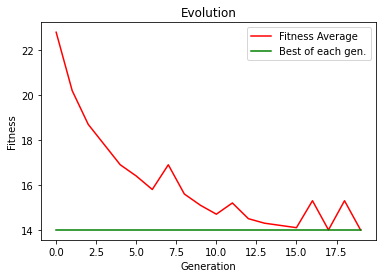

In [10]:
# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# Visualização gráfica do grid com a melhor solução econtrada

In [11]:
dimension = len(sol)
grid = np.zeros((dimension, dimension))
for index, value in enumerate(sol):
    grid[index][value] = 5

<ipython-input-12-f6406ee67e7f>:7: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  img = plt.imshow(grid, cmap = cmap,norm = norm)
<ipython-input-12-f6406ee67e7f>:7: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  img = plt.imshow(grid, cmap = cmap,norm = norm)


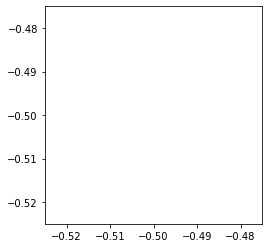

In [12]:
# make a color map of fixed colors
cmap = matplotlib.colors.ListedColormap(['white','black'])
bounds=[-2,2,6]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(grid, cmap = cmap,norm = norm)

plt.show()